In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
data = pd.read_csv("creditcard.csv", on_bad_lines='skip')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


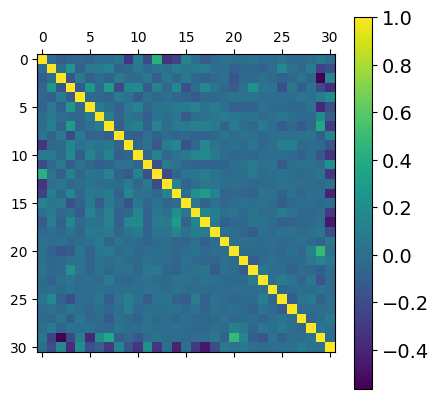

In [3]:

plt.matshow(data.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [4]:
X = data.drop('Class', axis=1)
X = X.interpolate()
y = data['Class']
y = y.interpolate()

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [5]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()

X_trains, y_trains = smt.fit_resample(X_train, y_train)

In [6]:
classifier.score(X_test, y_test)

0.9995419847328244

In [7]:
y_pred = classifier.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[13064,     2],
       [    4,    30]])

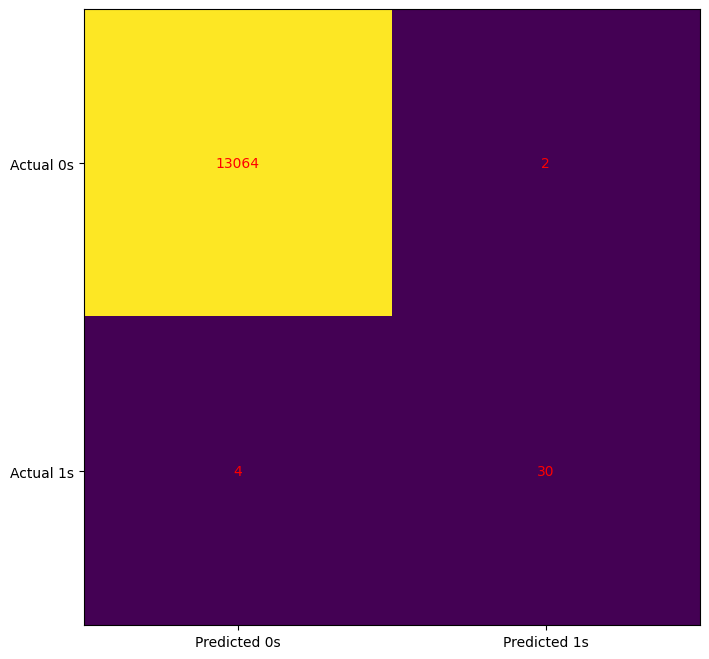

In [8]:
cm = confusion_matrix(y_test, classifier.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [9]:
cvScore = cross_val_score(classifier, X=X_train, y= y_train)

print(cvScore)

[0.99942748 0.99942748 0.99942748 0.99942748 0.99952286]


Gradient Boosting classifier

In [10]:
HGBclassifier = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)

HGBclassifier.score(X_test, y_test)

0.9984732824427481

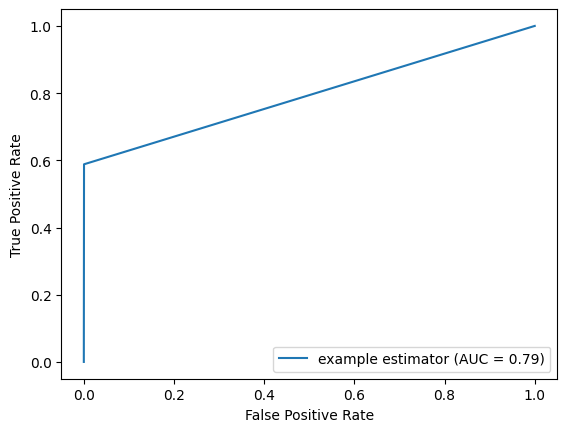

In [11]:
y_pred = HGBclassifier.predict(X_test)

df = pd.DataFrame(y_pred)
df.value_counts()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()

plt.show()

In [12]:
GBclassifier = GradientBoostingClassifier().fit(X_trains, y_trains)

In [13]:
y_prob_train = GBclassifier.predict_proba(X_trains)[:,1]
y_prob_test = GBclassifier.predict_proba(X_test)[:,1]

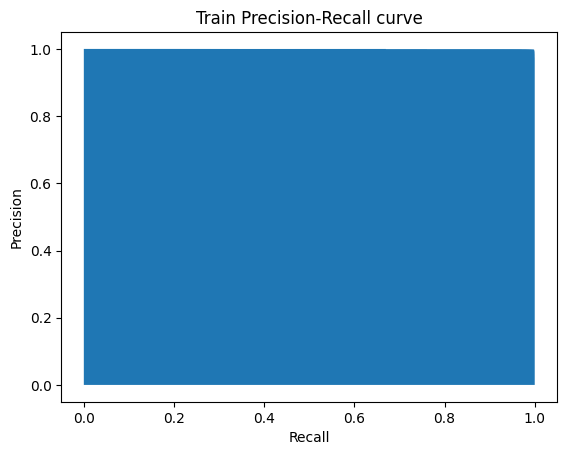

In [14]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_trains, y_prob_train)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [15]:
from sklearn.metrics import auc
pr_auc = auc(recall, precision)
print(pr_auc)

0.999758569094008
